<h1>Support Vector Regression</h1>

<h3>This notebook focuses on the creation of a Support Vector Regression Model</h3>

<p>Problem: predict the salary of a new employee based on his assumed position in the previous company</p>

<h3>Preprocessing as described in Part 1 of this course</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

dataFilePath = '../../data/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv'
dataset = pd.read_csv(dataFilePath)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

xStandardScaler = StandardScaler()
yStandardScaler = StandardScaler()
X = xStandardScaler.fit_transform(X)
y = np.ravel(yStandardScaler.fit_transform(y.reshape(-1, 1))) 

dataset.head(10)

/home/danilofrp/.virtualenvs/udemy/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<h3>Fitting Support Vector Regression to the dataset</h3>

In [2]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h3>Predicting the previous salary of the new employee</h3>

In [14]:
yPred = yStandardScaler.inverse_transform(regressor.predict(xStandardScaler.transform(np.array([[6.5]]))))[0]
print('Predicted salary using SVR: {}'.format(yPred))

Predicted salary using SVR: 170370.02040650236


<h3>Visualising the SVR Regression results</h3>

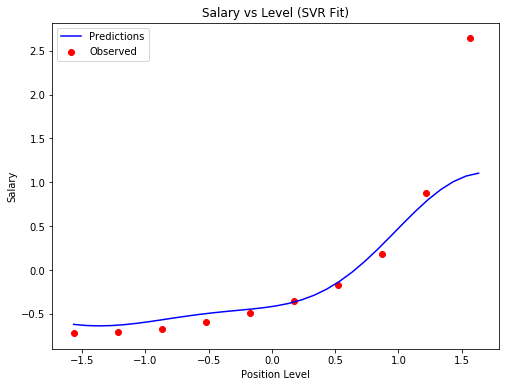

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
xGrid = np.arange(min(X), max(X) + 0.1, 0.1)
xGrid = xGrid.reshape((len(xGrid), 1))
plt.scatter(X, y, color = 'red', label = 'Observed')
plt.plot(xGrid, regressor.predict(xGrid), color = 'blue', label = 'Predictions')
plt.title('Salary vs Level (SVR Fit)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()